## Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# from fbprophet import Prophet

In [3]:
# !pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

## Loading the dataset

In [4]:
df = pd.read_csv('data.csv')
df.head()

,date,localIP,remoteASN,Count
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


## Preprocessing the dataset

In [5]:
# check null values
df.isnull().sum()

date         0
localIP      0
remoteASN    0
Count        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       20803 non-null  object
 1   localIP    20803 non-null  int64 
 2   remoteASN  20803 non-null  int64 
 3   Count      20803 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 650.2+ KB


In [7]:
# convert object to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       20803 non-null  datetime64[ns]
 1   localIP    20803 non-null  int64         
 2   remoteASN  20803 non-null  int64         
 3   Count      20803 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 650.2 KB


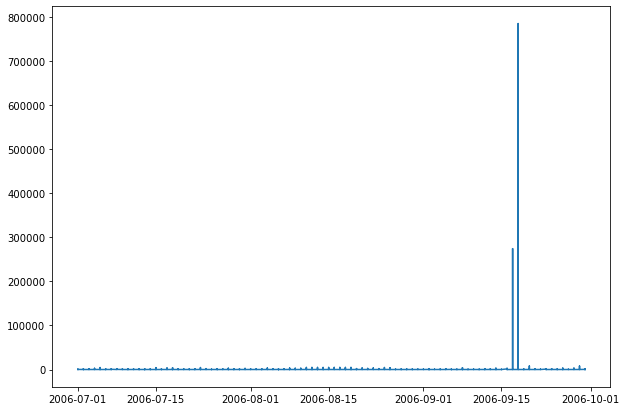

In [8]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['date'], df['Count'])
plt.show()

## Format data for the model

In [9]:
df.index = df['date']
df['y'] = df['Count']
df.drop(columns=['date','localIP','remoteASN','Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
date,
2006-07-01,5058
2006-07-02,7437
2006-07-03,7248
2006-07-04,8280
2006-07-05,27189


In [10]:
df['ds'] = df.index
df.head()

,y,ds
date,,
2006-07-01,5058,2006-07-01
2006-07-02,7437,2006-07-02
2006-07-03,7248,2006-07-03
2006-07-04,8280,2006-07-04
2006-07-05,27189,2006-07-05


## Input Split

In [11]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [12]:
train.tail()

,y,ds
date,,
2006-07-28,14514,2006-07-28
2006-07-29,4485,2006-07-29
2006-07-30,4309,2006-07-30
2006-07-31,9667,2006-07-31
2006-08-01,10163,2006-08-01


In [13]:
test.head()

,y,ds
date,,
2006-08-02,10020,2006-08-02
2006-08-03,4905,2006-08-03
2006-08-04,12395,2006-08-04
2006-08-05,4441,2006-08-05
2006-08-06,7427,2006-08-06


In [14]:
test.tail()

,y,ds
date,,
2006-09-26,13963,2006-09-26
2006-09-27,4143,2006-09-27
2006-09-28,11149,2006-09-28
2006-09-29,25281,2006-09-29
2006-09-30,15485,2006-09-30


## Model Training

In [15]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

NameError: name 'Prophet' is not defined

In [ ]:
future = model.make_future_dataframe(periods=60)
future

In [ ]:
forecast = model.predict(future)
forecast.head()

In [ ]:
model.plot_components(forecast)

In [ ]:
pred = forecast.iloc[-60:, :]
len(pred)

In [ ]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

In [ ]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

In [ ]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [ ]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

In [ ]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()